<a href="https://colab.research.google.com/github/proBIKRAM/AI-Lab-Bikram/blob/main/Utility_Based_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Utility Based Agent-Vacuum Cleaner**

## All Imports

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

## grid parameter

In [116]:
ROWS, COLS = 8, 8

# Grid: 30% mess (1), 70% clean (0)
grid = np.random.choice([0, 1], size=(ROWS, COLS), p=[0.7, 0.3])
was_dirty = (grid == 1).copy()

# Ensure at least one mess exists
if not np.any(grid == 1):
    rand_r, rand_c = np.random.randint(ROWS), np.random.randint(COLS)
    grid[rand_r][rand_c] = 1
    was_dirty[rand_r][rand_c] = True

## Start agent at clean spot


In [117]:
while True:
    agent_row, agent_col = np.random.randint(ROWS), np.random.randint(COLS)
    if grid[agent_row][agent_col] == 0:
        break

agent_pos = (agent_row, agent_col)

frames = []
text_frames = []

def save_frame(grid, agent_r, agent_c):
    frame = np.copy(grid)
    display_grid = frame.copy()
    display_grid[agent_r][agent_c] = 2  # 2 = Agent
    frames.append(frame)
    text_frames.append(display_grid)

## find shortest path


In [118]:
def bfs_shortest_path(start, targets):
    """Return shortest path from start to nearest target"""
    queue = deque()
    queue.append((start, [start]))
    visited = set([start])

    while queue:
        (r, c), path = queue.popleft()
        if (r, c) in targets:
            return path
        for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < ROWS and 0 <= nc < COLS and (nr, nc) not in visited:
                visited.add((nr, nc))
                queue.append(((nr, nc), path + [(nr, nc)]))
    return None

save_frame(grid, agent_pos[0], agent_pos[1])

while True:
    mess_positions = set(zip(*np.where(grid == 1)))
    if not mess_positions:
        break

    path = bfs_shortest_path(agent_pos, mess_positions)
    if not path:
        break

    agent_pos = path[-1]  # Hop directly to mess
    grid[agent_pos[0], agent_pos[1]] = 0  # Clean it
    save_frame(grid, agent_pos[0], agent_pos[1])

## plotting

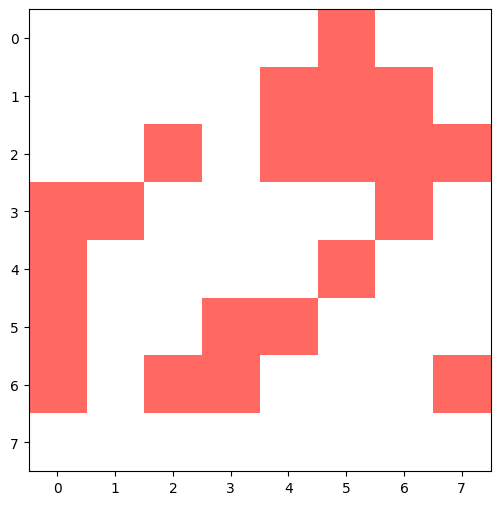

In [119]:

fig, ax = plt.subplots(figsize=(6,6))
colors = {
    0: "#ffffff",  # clean = white
    1: "#ff6961",  # mess = red
    2: "#1f77b4",  # agent = blue
}
cmap = plt.cm.colors.ListedColormap([colors[i] for i in range(3)])
im = ax.imshow(frames[0], cmap=cmap, vmin=0, vmax=2)

## Animation Grid

In [120]:
def update(i):
    ax.clear()
    im = ax.imshow(frames[i], cmap=cmap, vmin=0, vmax=2)
    ax.set_xticks(np.arange(COLS+1)-.5, minor=True)
    ax.set_yticks(np.arange(ROWS+1)-.5, minor=True)
    ax.grid(which='minor', color='black', linewidth=1)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    for r in range(ROWS):
        for c in range(COLS):
            val = text_frames[i][r][c]
            label = (
                "A" if val == 2 else
                "1" if val == 1 else
                "0"
            )
            ax.text(c, r, label, ha='center', va='center', fontsize=14, weight='bold')

    return [im]

## visualization function


In [121]:
ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=600, repeat=False)

from IPython.display import HTML
display(HTML(ani.to_jshtml()))